## Visión por Computadora 1 - Cohorte 17
## Trabajo Práctico 2
## Paola Cartala - Florentino Arias

## Parte 1: Implementar un algoritmo de enfoque que calcule la métrica descrita en el paper 'Image Sharpness Measure for Blurred Images in Frequency Domain'.
Implementamos la métrica de enfoque para un frame usando la Transformada Rápida de Fourier (FFT).

El valor máximo de la métrica de enfoque FFT es: 516066607.95100987


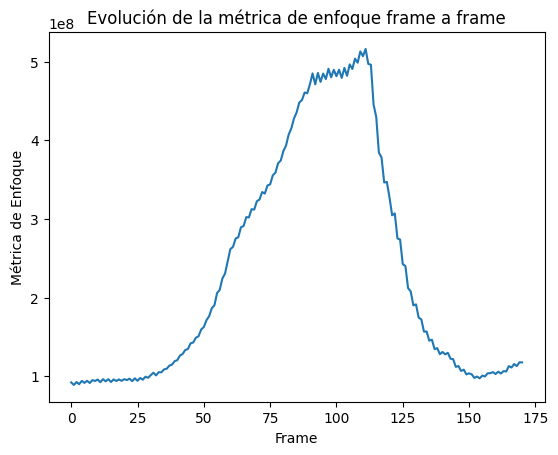

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Leer el video
video_path = 'focus_video.mov'
cap = cv.VideoCapture(video_path)

focus_scores = [] # Lista para almacenar los valores de la métrica de enfoque frame a frame
frame_count = 0 # Contador de frames

# Obtener el ancho, alto y fps del video original
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS)

# Definir el códec y crear el objeto VideoWriter para el nuevo video
output_path = 'focus_video_output_exp1.avi'
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read() # Leer un frame del video
    if not ret: # Si no se pudo leer el frame, terminar el loop
        break
    
    # Convertir el frame a escala de grises
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calcular la FFT y la magnitud del espectro
    f = np.fft.fft2(gray_frame) # Calcular la FFT
    fshift = np.fft.fftshift(f) # Centrar la frecuencia cero
    magnitude_spectrum = np.abs(fshift) # Calcular la magnitud del espectro
    
    # Calcular la métrica: suma de las frecuencias altas (evitar el centro de la FFT)
    center_x, center_y = magnitude_spectrum.shape[1] // 2, magnitude_spectrum.shape[0] // 2

    roi_radius = 20  # Tamaño del centro a evitar
    mask = np.ones_like(magnitude_spectrum) # Máscara para evitar el centro
    cv.circle(mask, (center_x, center_y), roi_radius, 0, -1) # Crear un círculo en el centro
    
    high_freq_values = magnitude_spectrum * mask # Aplicar la máscara
    focus_measure = np.sum(high_freq_values) # Calcular la métrica de enfoque
    focus_scores.append(focus_measure) # Guardar el valor de la métrica

    frame_count += 1 # Incrementar el contador de frames

max_focus_score = max(focus_scores)
min_focus_score = min(focus_scores)
print(f'El valor máximo de la métrica de enfoque FFT es: {max_focus_score:.2f}')
print(f'El valor mínimo de la métrica de enfoque FFT es: {min_focus_score:.2f}')

# Graficar la evolución de la métrica frame a frame
plt.plot(focus_scores)
plt.title('Evolución de la métrica de enfoque frame a frame')
plt.xlabel('Frame')
plt.ylabel('Métrica de Enfoque')
plt.show()

# Volver a abrir el video para añadir la superposición de las cajas y el texto
cap = cv.VideoCapture(video_path)
frame_count = 0  # Reiniciar el contador de frames

while cap.isOpened():
    ret, frame = cap.read()  # Leer un frame del video
    if not ret:
        break

    # Obtener el valor de la métrica de enfoque para el frame actual
    focus_measure = focus_scores[frame_count]

    # Determinar si la métrica es mayor o menor a 450000000 (valor elegido para considerar un frame desenfocado)
    if focus_measure < 430000000:
        # Dibujar un bounding box de color rojo que ocupe todo el ancho y alto del frame
        cv.rectangle(frame, (0, 0), (frame_width, frame_height), (0, 0, 255), 10)
        
        # Agregar el texto 'DESENFOCADO' con el valor de la métrica centrado en el frame
        text1 = f'DESENFOCADO'
        text2 = f'Metrica: {focus_measure:.2f}'
        font = cv.FONT_HERSHEY_SIMPLEX
        text_size1 = cv.getTextSize(text1, font, 2, 3)[0]
        text_size2 = cv.getTextSize(text2, font, 1, 3)[0]
        text1_x = (frame_width // 2) - (text_size1[0] // 2)
        text1_y = (frame_height // 4) - text_size1[1] // 2
        text2_x = (frame_width // 2) - (text_size2[0] // 2)
        text2_y = (frame_height // 4) * 3 - text_size2[1] // 2
        cv.putText(frame, text1, (text1_x, text1_y), font, 2, (0, 0, 255), 3, cv.LINE_AA)
        cv.putText(frame, text2, (text2_x, text2_y), font, 1, (0, 0, 255), 3, cv.LINE_AA)
    else:
        # Dibujar un bounding box de color verde que ocupe todo el ancho y alto del frame
        cv.rectangle(frame, (0, 0), (frame_width, frame_height), (0, 255, 0), 10)
        
        # Agregar el texto 'ENFOCADO' con el valor de la métrica centrado en el frame
        text1 = f'ENFOCADO'
        text2 = f'Metrica: {focus_measure:.2f}'
        font = cv.FONT_HERSHEY_SIMPLEX
        text_size1 = cv.getTextSize(text1, font, 2, 3)[0]
        text_size2 = cv.getTextSize(text2, font, 1, 3)[0]
        text1_x = (frame_width // 2) - (text_size1[0] // 2)
        text1_y = (frame_height // 4) - text_size1[1] // 2
        text2_x = (frame_width // 2) - (text_size2[0] // 2)
        text2_y = (frame_height // 4) * 3 - text_size2[1] // 2
        cv.putText(frame, text1, (text1_x, text1_y), font, 2, (0, 255, 0), 3, cv.LINE_AA)
        cv.putText(frame, text2, (text2_x, text2_y), font, 1, (0, 255, 0), 3, cv.LINE_AA)

    # Escribir el frame en el nuevo video
    out.write(frame)
    frame_count += 1

# Liberar los objetos VideoCapture y VideoWriter
cap.release()
out.release()


### Parte 1a: Medición sobre todo el Frame
El código de arriba ya calcula la métrica sobre todo el frame, y la gráfica muestra cómo varía la nitidez a lo largo del video.

El centro de la FFT representa las frecuencias bajas, que contienen información sobre los cambios graduales de la imagen (información de bajo detalle). Para evaluar el nivel de enfoque se necesitan las frecuencias altas, que están relacionadas con los detalles finos y los bordes, que son indicativos de una imagen enfocada. Por esto evitamos el centro de la FFT: se asegura que la métrica de enfoque esté basada únicamente en las frecuencias que aportan información sobre la nitidez de la imagen.

### Parte 1b: Medición sobre una ROI en el Centro del Frame
Calculamos la métrica solo en una región de interés (ROI) en el centro del frame. El área de la ROI será del 10% del área total del frame.

La cantidad de información espacial dentro de una ROI cuya área es del 10% del área total del frame es significativamente menor en comparación con la imagen completa. La Transformada de Fourier aplicada sobre una región pequeña tendrá menos componentes de frecuencia, y las frecuencias bajas en esa pequeña región aún pueden contener información importante sobre el enfoque de la subregión. Por eso no realizamos la operación de ignorar el centro de la FFT en este caso.

El valor máximo de la métrica de enfoque FFT para la ROI es: 1237860.51
El valor mínimo de la métrica de enfoque FFT para la ROI es: 333011.04


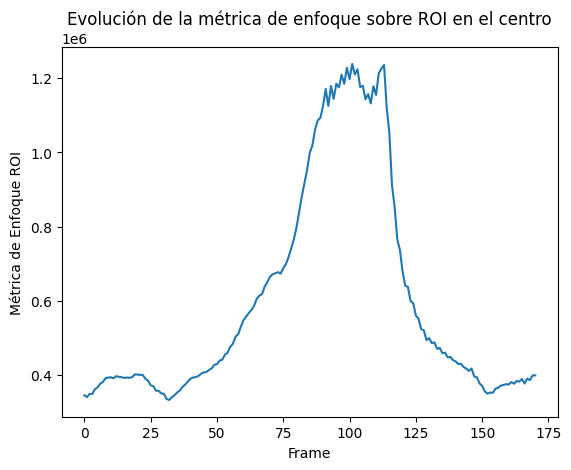

In [19]:
cap = cv.VideoCapture(video_path)
focus_scores_roi = []

# Definir el códec y crear el objeto VideoWriter para el nuevo video
output_path = 'focus_video_output_exp2_roi.avi'
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read() # Leer un frame del video
    if not ret:
        break
    
    # Convertir el frame a escala de grises
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Definir ROI en el centro del frame (10% del área total)
    h, w = gray_frame.shape # Alto y ancho del frame
    roi_h, roi_w = int(0.1 * h), int(0.1 * w) # Alto y ancho de la ROI
    start_x, start_y = (w - roi_w) // 2, (h - roi_h) // 2 # Coordenadas de inicio de la ROI
    roi = gray_frame[start_y:start_y + roi_h, start_x:start_x + roi_w] # Extraer la ROI
    
    # Calcular la FFT y la métrica para la ROI como antes
    f = np.fft.fft2(roi)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    
    # Calcular la métrica como antes
    focus_measure = np.sum(magnitude_spectrum)
    focus_scores_roi.append(focus_measure)

max_focus_score_roi = max(focus_scores_roi)
min_focus_score_roi = min(focus_scores_roi)
print(f'El valor máximo de la métrica de enfoque FFT para la ROI es: {max_focus_score_roi:.2f}')
print(f'El valor mínimo de la métrica de enfoque FFT para la ROI es: {min_focus_score_roi:.2f}')

# Graficar la evolución de la métrica en la ROI
plt.plot(focus_scores_roi)
plt.title('Evolución de la métrica de enfoque sobre ROI en el centro')
plt.xlabel('Frame')
plt.ylabel('Métrica de Enfoque ROI')
plt.show()

# Volver a abrir el video para añadir la superposición de las cajas y el texto
cap = cv.VideoCapture(video_path)
frame_count = 0  # Reiniciar el contador de frames

while cap.isOpened():
    ret, frame = cap.read()  # Leer un frame del video
    if not ret:
        break

    # Obtener el valor de la métrica de enfoque para el frame actual
    focus_measure = focus_scores_roi[frame_count]

    # Determinar si la métrica es mayor o menor a 450000000 (valor elegido para considerar un frame desenfocado)
    if focus_measure < 900000:
        # Dibujar un bounding box de color rojo que ocupe todo el ancho y alto del frame
        cv.rectangle(frame, (start_x, start_y), (start_x + roi_w, start_y + roi_h), (0, 0, 255), 1)
        
        # Agregar el texto 'DESENFOCADO' con el valor de la métrica centrado en el frame
        text1 = f'DESENFOCADO'
        text2 = f'Metrica: {focus_measure:.2f}'
        font = cv.FONT_HERSHEY_SIMPLEX
        text_size1 = cv.getTextSize(text1, font, 2, 3)[0]
        text_size2 = cv.getTextSize(text2, font, 1, 3)[0]
        text1_x = (frame_width // 2) - (text_size1[0] // 2)
        text1_y = (frame_height // 4) - text_size1[1] // 2
        text2_x = (frame_width // 2) - (text_size2[0] // 2)
        text2_y = (frame_height // 4) * 3 - text_size2[1] // 2
        cv.putText(frame, text1, (text1_x, text1_y), font, 2, (0, 0, 255), 3, cv.LINE_AA)
        cv.putText(frame, text2, (text2_x, text2_y), font, 1, (0, 0, 255), 3, cv.LINE_AA)
    else:
        # Dibujar un bounding box de color verde que ocupe todo el ancho y alto del frame
        cv.rectangle(frame, (start_x, start_y), (start_x + roi_w, start_y + roi_h), (0, 255, 0), 1)
        
        # Agregar el texto 'ENFOCADO' con el valor de la métrica centrado en el frame
        text1 = f'ENFOCADO'
        text2 = f'Metrica: {focus_measure:.2f}'
        font = cv.FONT_HERSHEY_SIMPLEX
        text_size1 = cv.getTextSize(text1, font, 2, 3)[0]
        text_size2 = cv.getTextSize(text2, font, 1, 3)[0]
        text1_x = (frame_width // 2) - (text_size1[0] // 2)
        text1_y = (frame_height // 4) - text_size1[1] // 2
        text2_x = (frame_width // 2) - (text_size2[0] // 2)
        text2_y = (frame_height // 4) * 3 - text_size2[1] // 2
        cv.putText(frame, text1, (text1_x, text1_y), font, 2, (0, 255, 0), 3, cv.LINE_AA)
        cv.putText(frame, text2, (text2_x, text2_y), font, 1, (0, 255, 0), 3, cv.LINE_AA)

    # Escribir el frame en el nuevo video
    out.write(frame)
    frame_count += 1

# Liberar los objetos VideoCapture y VideoWriter
cap.release()
out.release()


### Parte 1c: Medición sobre una Matriz de Enfoque (NxM)
Para esta parte vamos a dividir cada frame en una matriz de elementos rectangulares y a calcular la métrica para cada sección.

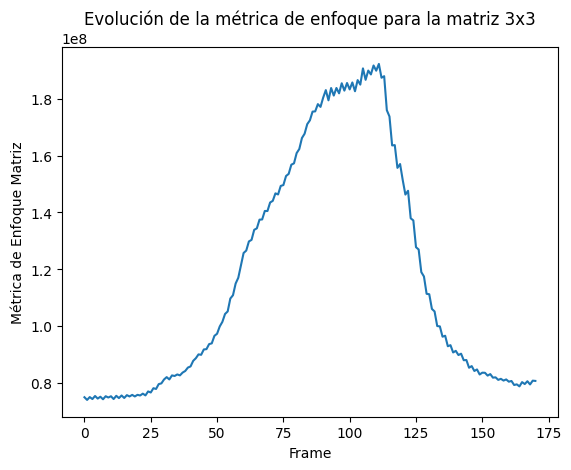

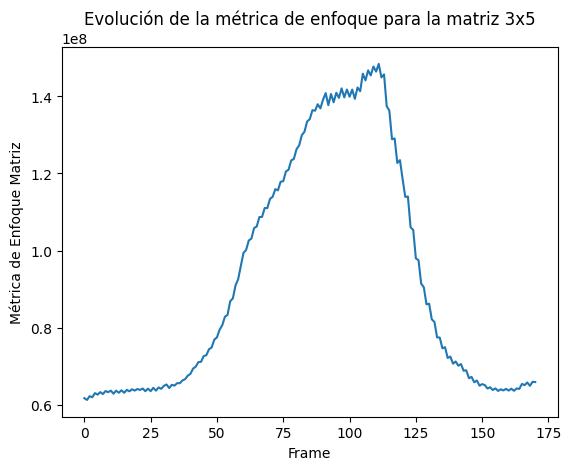

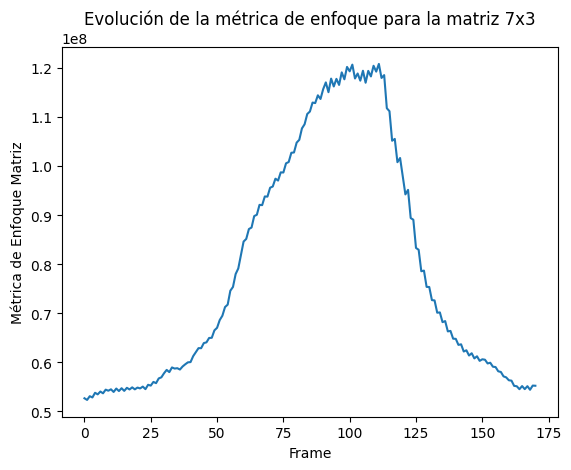

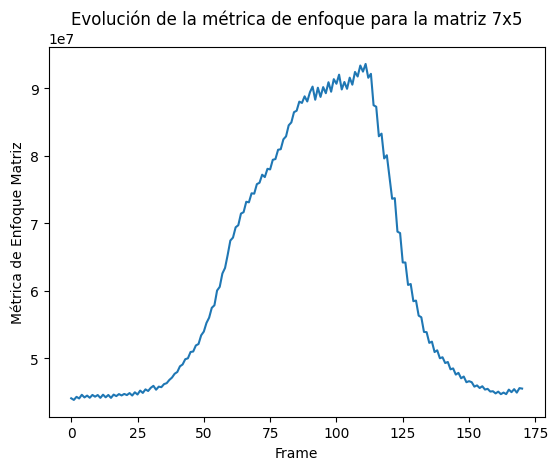

In [ ]:
N_values = [3, 7]  # Probar varios valores para N y M
M_values = [3, 5]

cap = cv.VideoCapture(video_path)

for N in N_values:  # Iterar sobre los valores de N y M para ir probando diferentes tamaños de matriz
    for M in M_values:
        focus_scores_grid = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Convertir el frame a escala de grises
            gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            h, w = gray_frame.shape # Alto y ancho del frame
            step_h, step_w = h // N, w // M # Tamaño de cada celda en la matriz
            
            total_focus = 0
            # Iterar sobre la matriz NxM
            for i in range(N):
                for j in range(M):
                    roi = gray_frame[i*step_h:(i+1)*step_h, j*step_w:(j+1)*step_w] # Extraer la ROI
                    
                    # Calcular la FFT y la métrica para la ROI como antes
                    f = np.fft.fft2(roi)
                    fshift = np.fft.fftshift(f)
                    magnitude_spectrum = np.abs(fshift)
                    
                    # Sumar las métricas para cada sección
                    total_focus += np.sum(magnitude_spectrum) # Calcular la métrica de enfoque

            focus_scores_grid.append(total_focus) # Guardar el valor de la métrica

        cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Reiniciar video para la siguiente iteración

        # Graficar la evolución de la métrica sobre la matriz
        plt.plot(focus_scores_grid)
        plt.title(f'Evolución de la métrica de enfoque para la matriz {N}x{M}')
        plt.xlabel('Frame')
        plt.ylabel('Métrica de Enfoque Matriz')
        plt.show()

cap.release()


Visualización de la ROI o Matriz Superpuesta al Video
Para marcar los frames en rojo o verde según el enfoque:

In [5]:
cap = cv.VideoCapture(video_path)
out = cv.VideoWriter('focus_output.avi', cv.VideoWriter_fourcc(*'XVID'), 30, (int(cap.get(3)), int(cap.get(4))))

for i, score in enumerate(focus_scores_roi):  # Usando la métrica ROI como ejemplo
    ret, frame = cap.read()
    if not ret:
        break
    
    color = (0, 255, 0) if score == max(focus_scores_roi) else (0, 0, 255)
    # Dibujar el rectángulo de la ROI
    cv.rectangle(frame, (start_x, start_y), (start_x+roi_w, start_y+roi_h), color, 2)
    
    out.write(frame)

cap.release()
out.release()


## Parte 2: Cambiar la Métrica de Enfoque
En esta parte podemos utilizar una métrica diferente, como la de la varianza de Laplaciano:

In [ ]:
cap = cv2.VideoCapture(video_path)
laplacian_focus_scores = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray_frame, cv2.CV_64F).var()
    laplacian_focus_scores.append(laplacian_var)

cap.release()

# Graficar la evolución de la nueva métrica
plt.plot(laplacian_focus_scores)
plt.title('Evolución de la métrica de enfoque con Laplaciano')
plt.xlabel('Frame')
plt.ylabel('Varianza del Laplaciano')
plt.show()
